In [3]:
import os
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging

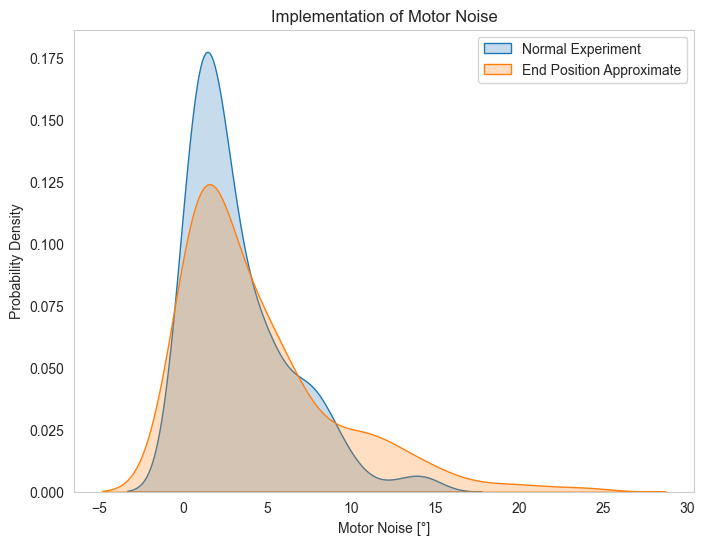

In [35]:
# Load the data
file_path_normal = "participant_data/participant_AN_2025-02-06-10-31-42.csv"
file_path_endpos_approx = "participant_data/participant_AN_2025-02-06-12-10-55.csv"

data_normal = pd.read_csv(file_path_normal)
data_endpos_approx = pd.read_csv(file_path_endpos_approx)

# Extract motor noise values (assuming they are stored in 'noise_x' and 'noise_y')
motor_noise_normal = np.sqrt(data_normal['noise_x']**2 + data_normal['noise_y']**2)
motor_noise_endpos_approx = np.sqrt(data_endpos_approx['noise_x']**2 + data_endpos_approx['noise_y']**2)

# Create density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(motor_noise_normal, label="Normal Experiment", fill=True)
sns.kdeplot(motor_noise_endpos_approx, label="End Position Approximate", fill=True)

plt.xlabel("Motor Noise [°]")
plt.ylabel("Probability Density")
plt.title("Implementation of Motor Noise")
plt.legend()
plt.grid()
plt.savefig(os.path.abspath(f'plots/motor_noise.png'))
plt.show()

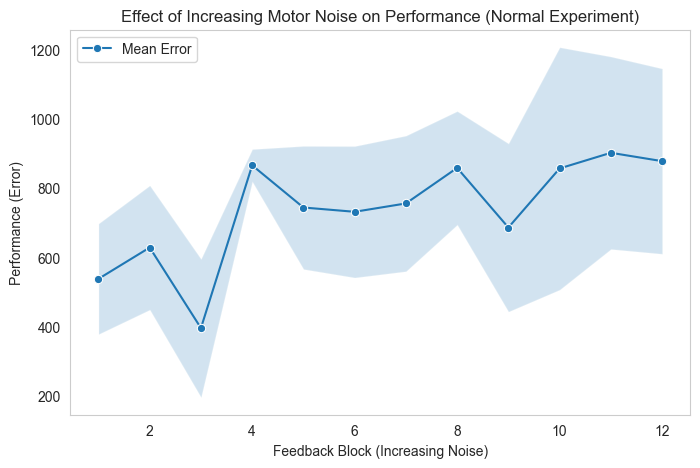

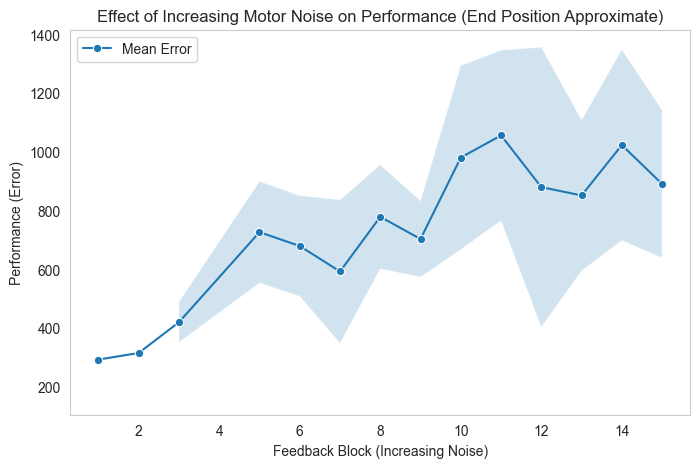

In [44]:
df_normal = pd.read_csv(file_path_normal)
df_endpos = pd.read_csv(file_path_endpos_approx)

# Function to compute performance
def compute_performance(df, experiment_name):
    df['error'] = np.sqrt(df['x']**2 + df['y']**2)  # Distance from (0,0)
    
    # Group by feedback block (assumed increasing noise)
    df_grouped = df.groupby('feedback_block').agg({'error': ['mean', 'std']}).reset_index()
    df_grouped.columns = ['feedback_block', 'mean_error', 'std_error']
    
    # Plot: Noise Level vs Performance
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df_grouped, x="feedback_block", y="mean_error", marker="o", label="Mean Error")
    plt.fill_between(df_grouped["feedback_block"], 
                     df_grouped["mean_error"] - df_grouped["std_error"], 
                     df_grouped["mean_error"] + df_grouped["std_error"], alpha=0.2)

    plt.xlabel("Feedback Block (Increasing Noise)")
    plt.ylabel("Performance (Error)")
    plt.title(f"Effect of Increasing Motor Noise on Performance ({experiment_name})")
    plt.legend()
    plt.grid()
    plt.savefig(os.path.abspath(f'plots/{experiment_name}_noise_effect.png'))
    plt.show()

# Plot for each experiment separately
compute_performance(df_normal, "Normal Experiment")
compute_performance(df_endpos, "End Position Approximate")

In [16]:
df_all = df_normal

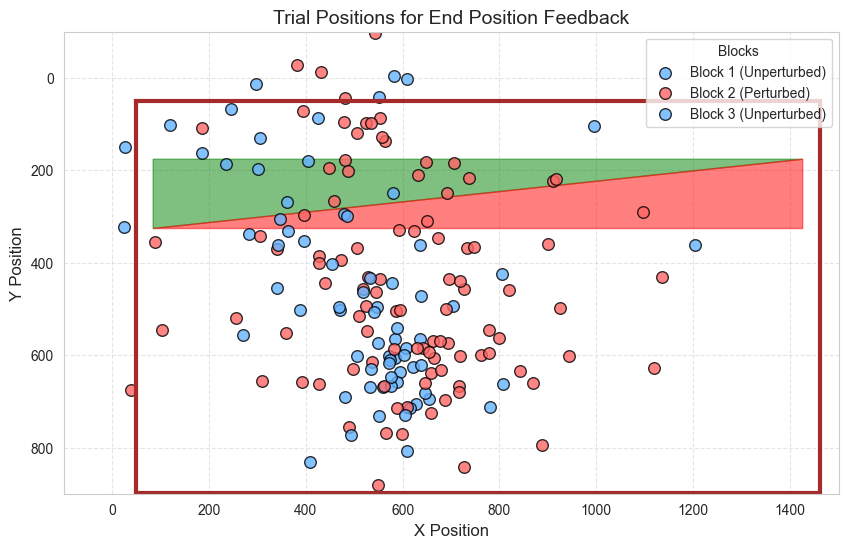

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

def plot_trial_positions(data):
    """Plots trial positions categorized by feedback type and perturbation condition."""
    
    # Define feedback block mappings
    feedback_blocks = {
        'endpos': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    }

    # Define block colors (Perturbed = Red, Unperturbed = Blue)
    block_colors = {
        1: '#66B3FF',  # Blue (Unperturbed)
        2: '#FF6666',  # Red (Perturbed)
        3: '#66B3FF',  # Blue (Unperturbed)
    }

    # Define block labels
    block_mapping = {
        1: "Block 1 (Unperturbed)",
        2: "Block 2 (Perturbed)",
        3: "Block 3 (Unperturbed)"
    }

    # Assign feedback type based on blocks
    data['feedback_type'] = data['feedback_block'].map({
        block: fb for fb, blocks in feedback_blocks.items() for block in blocks
    })

    # Map feedback blocks into block levels (1 = Unperturbed, 2 = Perturbed, 3 = Unperturbed)
    data['block_level'] = data['feedback_block'].apply(lambda x: (x - 1) % 3 + 1)

    # Plot
    plt.figure(figsize=(10, 6))

    # Draw Green & Red Zones
    green_polygon = patches.Polygon([[85, 176], [85, 326], [1426, 176]], color="green", alpha=0.5)
    red_polygon = patches.Polygon([[1426, 326], [1426, 176], [85, 326]], color="red", alpha=0.5)

    plt.gca().add_patch(green_polygon)
    plt.gca().add_patch(red_polygon)

    # Plot each block level
    for block_level, group in data.groupby('block_level'):
        plt.scatter(group['x'], group['y'],
                    label=block_mapping[block_level],
                    color=block_colors[block_level],  
                    alpha=0.8, edgecolors='black', s=70)

    # Draw border rectangle
    plt.gca().add_patch(plt.Rectangle((50, 49), 1412, 850, fill=False, edgecolor='brown', linewidth=3))

    # Improve Labels & Titles
    plt.xlabel("X Position", fontsize=12)
    plt.ylabel("Y Position", fontsize=12)
    plt.title("Trial Positions for End Position Feedback", fontsize=14)

    # Legend
    plt.legend(title="Blocks", loc="upper right", fontsize=10, frameon=True)

    # Fix Y-Axis Limits (Inverted)
    plt.ylim(900, -100)  
    plt.xlim(-100, 1500)
    plt.grid(True, linestyle="--", alpha=0.5) 

    # Save & Show
    plt.savefig("trial_positions_endpos.png", dpi=300)
    plt.show()

# Example Usage
plot_trial_positions(df_normal)


<Figure size 1000x600 with 0 Axes>

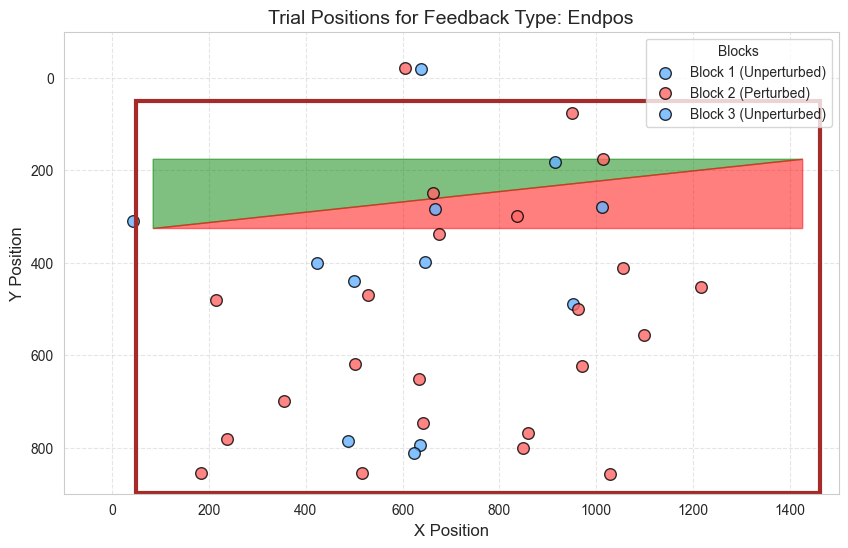

<Figure size 1000x600 with 0 Axes>

In [32]:
df_all = df_endpos

# Define feedback block mappings based on block design
feedback_blocks = {
    'endpos': [1, 2, 3],  
    'endpos': [4, 5, 6],
    'endpos': [7, 8, 9],
    'endpos': [10, 11, 12],
    'endpo_approx': [13, 14, 15],
}

feedback_block_order = ['none', 'endpos', 'endpos_approx']

# Define colors for perturbed and unperturbed
block_colors = {
    1: '#66B3FF',  # Blue (Unperturbed)
    2: '#FF6666',  # Red (Perturbed)
    3: '#66B3FF'   # Blue (Unperturbed)
}

# Define block labels
block_mapping = {
    1: "Block 1 (Unperturbed)",
    2: "Block 2 (Perturbed)",
    3: "Block 3 (Unperturbed)"
}

# Apply the feedback mapping
df_all['feedback_type'] = df_all['feedback_block'].map({
    block: feedback for feedback, blocks in feedback_blocks.items() for block in blocks
})

# Assign a single subject ID (assuming one subject)
df_all['subject_id'] = 1

# Generate separate plots for each feedback type
for fb_type in feedback_block_order:
    plt.figure(figsize=(10, 6))

    # Filter trials for the current feedback type
    trials = df_all[df_all['feedback_type'] == fb_type].copy()
    if trials.empty:
        continue  # Skip if no data for this feedback type

    # Map feedback blocks into block levels (1, 2, 3)
    trials['block_level'] = trials['feedback_block'].apply(lambda x: (x - 1) % 3 + 1)

    # Group by block level
    grouped_feedback_block = trials.groupby('block_level')

    # Draw Green & Red Zones
    green_polygon = patches.Polygon([[85, 176], [85, 326], [1426, 176]], color="green", alpha=0.5)
    red_polygon = patches.Polygon([[1426, 326], [1426, 176], [85, 326]], color="red", alpha=0.5)

    plt.gca().add_patch(green_polygon)
    plt.gca().add_patch(red_polygon)

    # Plot each block level
    for block_level, group in grouped_feedback_block:
        plt.scatter(group['x'], group['y'],
                    label=block_mapping[block_level],
                    color=block_colors[block_level],  
                    alpha=0.8, edgecolors='black', s=70)

    # Draw border rectangle
    plt.gca().add_patch(plt.Rectangle((50, 49), 1412, 850, fill=False, edgecolor='brown', linewidth=3))

    # Improve Labels & Titles
    plt.xlabel("X Position", fontsize=12)
    plt.ylabel("Y Position", fontsize=12)
    plt.title(f"Trial Positions for Feedback Type: {fb_type.capitalize()}", fontsize=14)

    # Legend
    plt.legend(title="Blocks", loc="upper right", fontsize=10, frameon=True)

    # Fix Y-Axis Limits (Inverted)
    plt.ylim(900, -100)  
    plt.xlim(-100, 1500)
    plt.grid(True, linestyle="--", alpha=0.5) 

    # Save & Show
    plt.savefig(f"feedback_{fb_type}.png", dpi=300)
    plt.show()




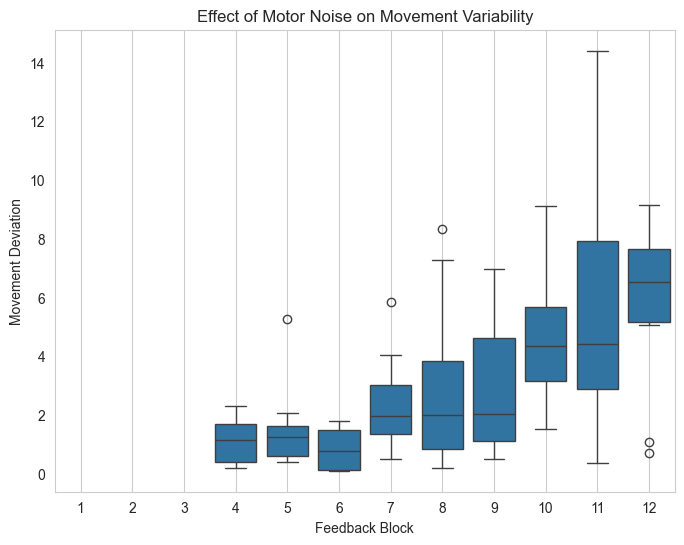

In [37]:
def plot_noise_impact(data):
    """Boxplot to show variability in movement under different noise levels."""
    data['movement_deviation'] = np.sqrt(data['noise_x']**2 + data['noise_y']**2)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='feedback_block', y='movement_deviation', data=data)
    plt.title('Effect of Motor Noise on Movement Variability')
    plt.xlabel('Feedback Block')
    plt.ylabel('Movement Deviation')
    plt.grid()
    plt.savefig(os.path.abspath(f'plots/noise_impact.png'))
    plt.show()

plot_noise_impact(data=df_normal)

In [64]:
df_pivot = df_accuracy.pivot(
    index='feedback_type', 
    columns='block_level', 
    values='accuracy'
)
df_pivot.columns = [f"Block_{col}" for col in df_pivot.columns]  # rename columns
df_pivot = df_pivot.reindex([
    'no feedback', 
    'trajectory', 
    'endpos', 
    'rl', 
    'endpos_approx'
])  # reorder to match your feedback_block_order

# Inspect
print(df_pivot)

               Block_1   Block_2   Block_3
feedback_type                             
no feedback       0.15  0.250000  0.000000
trajectory        0.30  0.216667  0.250000
endpos            0.15  0.150000  0.100000
rl                0.20  0.200000  0.454545
endpos_approx     0.30  0.033333  0.100000


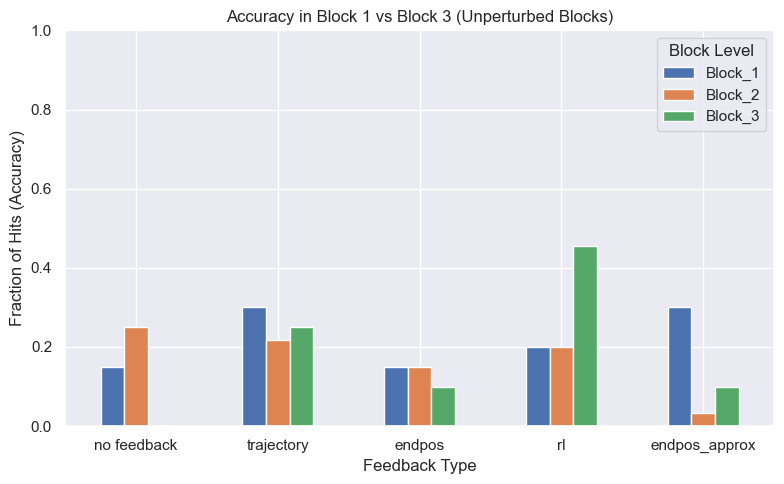

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

ax = df_pivot.plot(kind='bar', figsize=(8,5))

ax.set_title("Accuracy in Block 1 vs Block 3 (Unperturbed Blocks)")
ax.set_ylabel("Fraction of Hits (Accuracy)")
ax.set_xlabel("Feedback Type")
ax.set_ylim(0, 1.0)  # Assuming accuracy ranges between 0 and 1

# Display the legend (columns are Block_1, Block_3)
ax.legend(title="Block Level")

# Optional: rotate x-labels for readability
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig(os.path.abspath(f'{cur_dir}/plots/block_accuracy.png'))
plt.show()

In [42]:
feedback_colors = {
    'trajectory': 'blue',
    'endpos': 'red',
    'rl': 'green',
    "no feedback": 'black',
    "endpos_approx": 'pink'
}

block_mapping = {
    1: "Block 1 (unperturbed)",
    2: "Block 2 (perturbed)",
    3: "Block 3 (unperturbed)"
}

# Define colors (matching the reference image)
dark_green = np.array([0, 100, 0]) / 255.0
light_green = np.array([144, 238, 144]) / 255.0
dark_red = np.array([139, 0, 0]) / 255.0
light_red = np.array([255, 182, 193]) / 255.0


In [43]:
def generate_gradient_image(scoring_rect, start_color, end_color):
    """Generate a gradient effect over a rectangular region with full RGB interpolation."""
    width, height = scoring_rect["scoring_width"], scoring_rect["scoring_height"]

    # Normalize colors to the range [0,1]
    start_color = np.array(start_color) / 255.0
    end_color = np.array(end_color) / 255.0

    # Create linear interpolation for all three RGB channels
    x = np.linspace(0, 1, width)
    y = np.linspace(0, 1, height)
    X, Y = np.meshgrid(x, y)

    # Interpolate between start_color and end_color for each channel
    gradient_image = np.zeros((height, width, 3))
    for i in range(3):  # Loop over RGB channels
        gradient_image[:, :, i] = np.outer(np.ones(height), np.linspace(start_color[i], end_color[i], width))

    return gradient_image


INFO:root:Feedback Types: ['no feedback' 'trajectory' 'endpos' 'rl' 'endpos_approx']


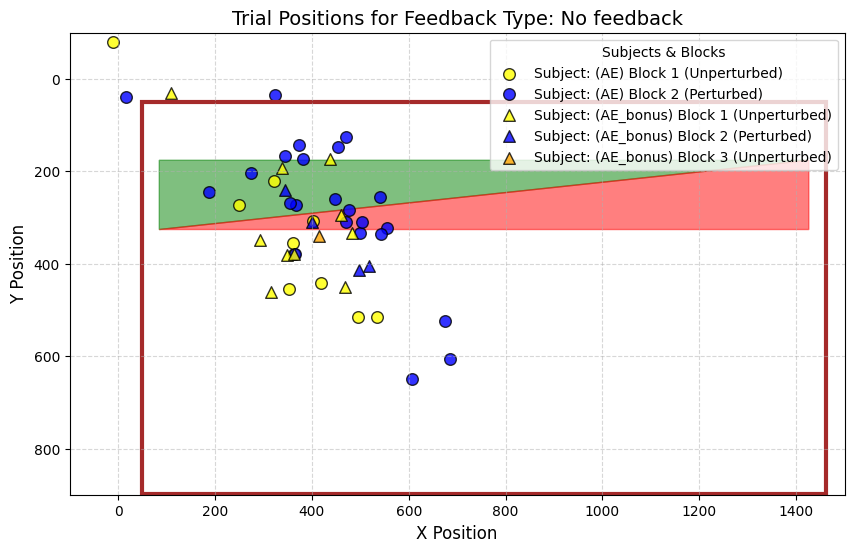

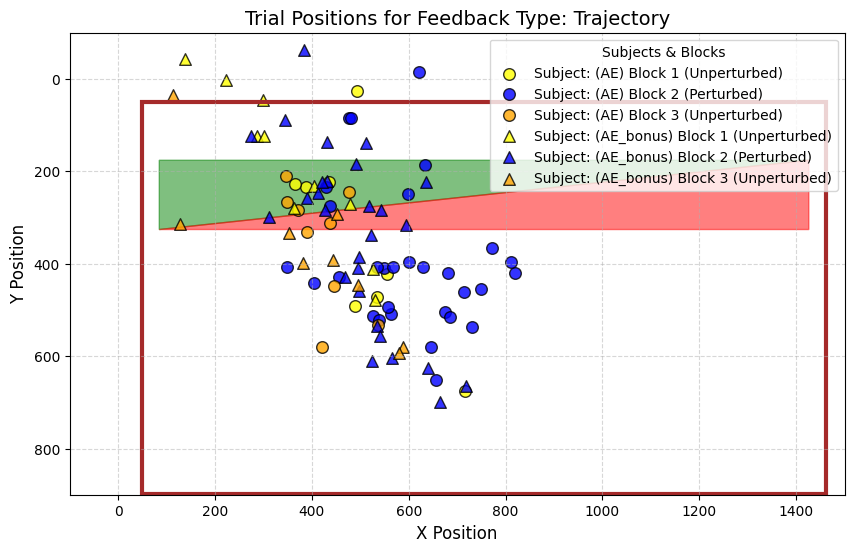

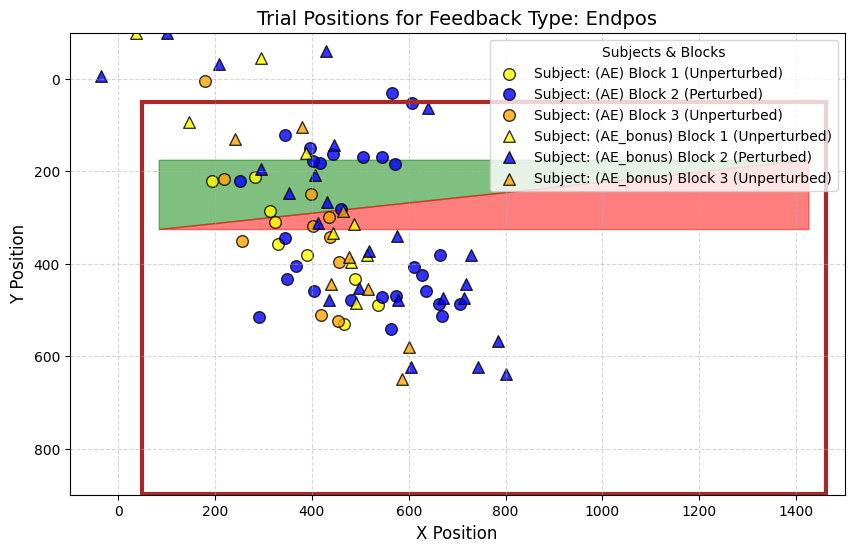

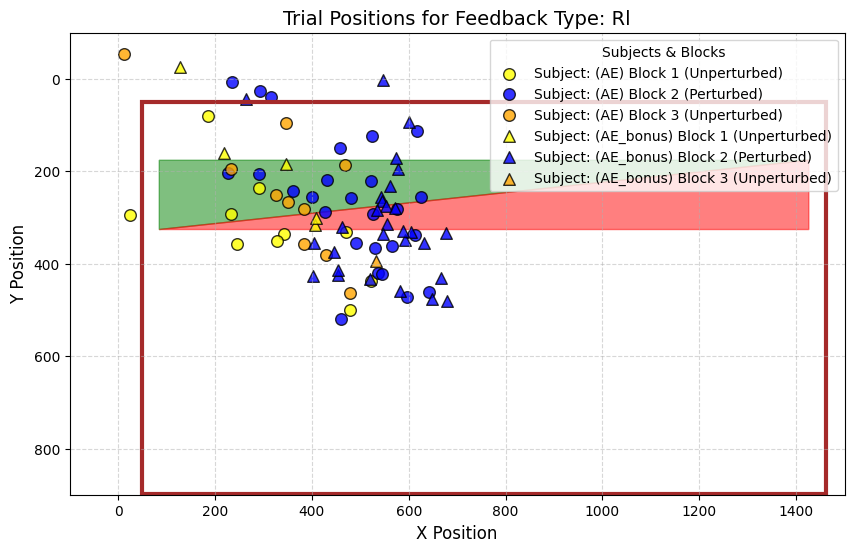

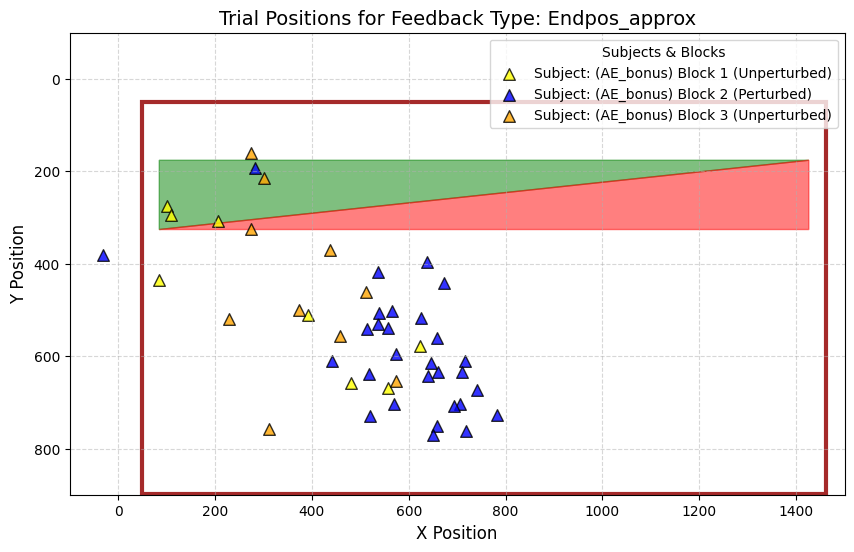

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Define feedback block mappings
feedback_blocks = {
    'no feedback': [1, 2, 3],  # Normal feedback type
    'trajectory': [4, 5, 6],
    'endpos': [7, 8, 9],
    'rl': [10, 11, 12],
    'endpos_approx': [13, 14, 15],
}
feedback_block_order = ['no feedback', 'trajectory', 'endpos', 'rl', 'endpos_approx']
# Define block labels for the legend
block_mapping = {
    1: "Block 1 (Unperturbed)",
    2: "Block 2 (Perturbed)",
    3: "Block 3 (Unperturbed)"
}

# Define colors for feedback types
feedback_colors = {
    'trajectory': 'blue',
    'endpos': 'red',
    'rl': 'green',
    'no feedback': 'black'
}

# Define block colors
block_colors = {1: 'yellow', 2: 'blue', 3: 'orange'}

# Load dataset
df_all = pd.concat(dfs, ignore_index=True)  # Merge all subjects' data

# Apply the feedback mapping
df_all['feedback_type'] = df_all['feedback_block'].map({
    block: feedback for feedback, blocks in feedback_blocks.items() for block in blocks
})


# possible marker styles
marker_list = ['o', '^', 's', 'D', 'v', 'P']  # circles, triangles, squares, diamonds, inverted triangles, plus, etc.

# unique subject IDs
unique_subjects = df_all['subject_id'].unique()

# mapping: subject_id -> marker style

subject_marker_map = {}
for i, subj in enumerate(unique_subjects):
    subject_marker_map[subj] = marker_list[i % len(marker_list)]

logging.info(f"Feedback Types: {df_all['feedback_type'].unique()}")
# Generate separate plots for each feedback type
for fb_type in feedback_block_order:#feedback_blocks.keys():
    plt.figure(figsize=(10, 6))

    # Filter trials for the current feedback typy
    trials = df_all[df_all['feedback_type'] == fb_type].copy()
    if trials.empty:
        continue  # Skip if no data for this feedback type

    # Map feedback blocks into block levels (1, 2, 3)**
    trials['block_level'] = trials['feedback_block'].apply(lambda x: (x - 1) % 3 + 1)

    # Group by subject and block level**
    grouped_feedback_block = trials.groupby(['subject_id', 'block_level'])

    # Fix Reversed Green & Red Zones**
    green_polygon = patches.Polygon(
        [[85, 176], [85, 326], [1426, 176]], color="green", alpha=0.5  # Red is now on the LEFT
    )
    red_polygon = patches.Polygon(
        [[1426, 326], [1426, 176], [85, 326]], color="red", alpha=0.5  # Green is now on the RIGHT
    )

    plt.gca().add_patch(green_polygon)
    plt.gca().add_patch(red_polygon)

    # Plot each group (each subject & block level)**
    for (subject_id, block_level), group in grouped_feedback_block:
        plt.scatter(group['x'], group['y'],
                    label=f"Subject: ({subject_id}) {block_mapping[block_level]}",
                    color=block_colors[block_level], 
                    marker=subject_marker_map[subject_id],    
                    alpha=0.8, edgecolors='black', s=70)  # Increase size & edge contrast

    # Use JSON's Table Rectangle to Draw the Exact Border
    plt.gca().add_patch(plt.Rectangle(
        (50, 49), 1412, 850,  # Exact values from JSON
        fill=False, edgecolor='brown', linewidth=3
    ))

    # Improve Labels & Titles
    plt.xlabel("X Position", fontsize=12)
    plt.ylabel("Y Position", fontsize=12)
    plt.title(f"Trial Positions for Feedback Type: {fb_type.capitalize()}", fontsize=14)

    # Legend Improvements
    plt.legend(title="Subjects & Blocks", loc="upper right", fontsize=10, frameon=True)

    # Fix Y-Axis Limits (Inverted)**
    plt.ylim(900, -100)  # Match original Pygame coordinate system
    plt.xlim(-100, 1500)
    plt.grid(True, linestyle="--", alpha=0.5) 

    #Show the final plot
    plt.savefig(os.path.abspath(f"{cur_dir}/plots/feedback_{fb_type}.png"))

    plt.show()


In [1]:
# Load the data
file_path_normal = "participant_data/participant_AN_2025-02-06-10-31-42.csv"
file_path_endpos_approx = "participant_data/participant_AN_2025-02-06-12-10-55.csv"

data_normal = pd.read_csv(file_path_normal)
data_endpos_approx = pd.read_csv(file_path_endpos_approx)

# Extract motor noise values (assuming they are stored in 'noise_x' and 'noise_y')
motor_noise_normal = np.sqrt(data_normal['noise_x']**2 + data_normal['noise_y']**2)
motor_noise_endpos_approx = np.sqrt(data_endpos_approx['noise_x']**2 + data_endpos_approx['noise_y']**2)

# Create density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(motor_noise_normal, label="Normal Experiment", fill=True)
sns.kdeplot(motor_noise_endpos_approx, label="End Position Approximate", fill=True)

plt.xlabel("Motor Noise [°]")
plt.ylabel("Probability Density")
plt.title("Implementation of Motor Noise")
plt.legend()
plt.grid()
plt.show()

NameError: name 'pd' is not defined